In [272]:
import os
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from Ensembled_ANN import ensembled_ANN
from sklearn.preprocessing import MinMaxScaler
from data_processor import series_to_supervised,evaluate
%matplotlib inline

In [108]:
# load data
dir_power = 'power_detrended'
dir_NWP = 'nwp_refill'

name_index_power = pd.Series(os.listdir(dir_power)).map(lambda x:x[:-4])

name_index_NWP = list(os.listdir(dir_NWP))
name_index_NWP.remove('.DS_Store')
name_index_NWP = pd.Series(name_index_NWP).map(lambda x:x[3:-4])

In [43]:
names = locals()

In [44]:
for i in name_index_power:
    filename = 'power_detrended/'+str(i)+'.csv'
    names['data_%s' % i] = pd.read_csv(filename, index_col=3, parse_dates=True)
    names['power_%s' % i] = pd.DataFrame(names['data_%s' % i]['power'])
    names['power_supervised_%s' % i] = series_to_supervised(names['power_%s' % i], 48, 16)

In [109]:
for i in name_index_NWP:
    filename = 'nwp_refill/CN0'+str(i)+'.csv'
    names['NWP_%s' % i] = pd.read_csv(filename, index_col=0, parse_dates=True)

In [111]:
NWP_016.head()

,temperature,Momentum_flux,wind_direction_30,windspeed_170,windspeed_100,windspeed_30,windspeed_10,windspeed_ground,wind_direction_170,wind_direction_100,...,shortwave_radiation,longwave_radiation,air_pressure,prt,Large_scale_precipitation,Convective_precipitation,T2m,humidity,hahaha,hehehe
2017-01-02 00:00:00,270.29,0.01,168.78,3.31,3.06,2.80,0.92,1.05,178.60,171.83,...,2.12,-79.61,847.74,0.0,0.0,0.0,265.43,87.23,4.0,88.0
2017-01-02 00:15:00,270.20,0.01,169.65,3.63,3.36,3.04,1.03,1.17,179.99,173.16,...,2.12,-79.02,847.71,0.0,0.0,0.0,265.29,87.91,4.0,89.0
2017-01-02 00:30:00,270.10,0.01,170.02,3.95,3.65,3.26,1.14,1.29,180.88,173.87,...,2.11,-78.47,847.67,0.0,0.0,0.0,265.18,88.39,4.0,90.0
2017-01-02 00:45:00,269.99,0.01,170.38,4.28,3.94,3.49,1.26,1.42,181.76,174.58,...,2.10,-77.93,847.62,0.0,0.0,0.0,265.07,88.88,4.0,91.0
2017-01-02 01:00:00,269.89,0.01,170.75,4.60,4.23,3.71,1.37,1.54,182.65,175.29,...,2.09,-77.38,847.58,0.0,0.0,0.0,264.96,89.36,4.0,92.0


### #############

In [122]:
cloud = pd.DataFrame(NWP_016.cloud_amount)

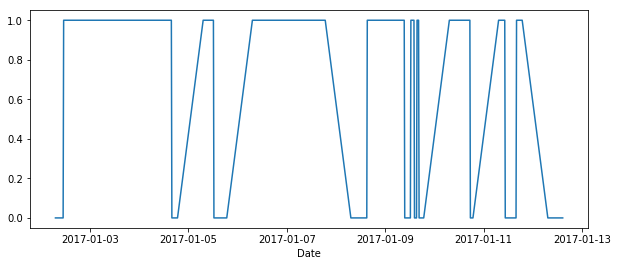

In [163]:
def purchase_seq_display(timeseries):
    graph = plt.figure(figsize=(10, 4))
    ax = graph.add_subplot(111)
    ax.set(title='',
           ylabel='', xlabel='Date')
    plt.plot(timeseries)
    plt.show()


purchase_seq_display(cloud.fluctuate[:500])

In [158]:
cloud['cloud_diff'] = cloud.diff(1)
cloud = cloud.fillna(0)

In [159]:
cloud.head()

,cloud_amount,cloud_diff,fluctuate
2017-01-02 07:15:00,0.83,0.00,0
2017-01-02 07:30:00,0.89,0.06,0
2017-01-02 07:45:00,0.95,0.06,0
2017-01-02 08:00:00,1.01,0.06,0
2017-01-02 08:15:00,1.12,0.11,0


###### 1为波动大，0为波动小

In [147]:
cloud['fluctuate'] = [0 if ((cloud.cloud_amount[i]>80 or cloud.cloud_amount[i]<5) and abs(cloud.cloud_diff[i])<1) 
                      else 1 
                      for i in range(len(cloud))]

In [153]:
sun_rise = datetime.time(7,0)
sun_set = datetime.time(19,0)
cloud.index.time

array([datetime.time(0, 0), datetime.time(0, 15), datetime.time(0, 30),
       ..., datetime.time(1, 30), datetime.time(1, 45),
       datetime.time(2, 0)], dtype=object)

In [157]:
cloud = cloud[(cloud.index.time < sun_set) & (cloud.index.time > sun_rise)]

In [178]:
index_stable = [x for x in cloud[cloud.fluctuate == 0].index if x < datetime.datetime(2019,1,1)]
index_fluc = [x for x in cloud[cloud.fluctuate == 1].index if x < datetime.datetime(2019,1,1)]

In [302]:
power_stable = power66.loc[index_stable]

In [320]:
cloud[:96]

,cloud_amount,cloud_diff,fluctuate
2017-01-02 07:15:00,0.83,0.00,0
2017-01-02 07:30:00,0.89,0.06,0
2017-01-02 07:45:00,0.95,0.06,0
2017-01-02 08:00:00,1.01,0.06,0
2017-01-02 08:15:00,1.12,0.11,0
2017-01-02 08:30:00,1.28,0.16,0
2017-01-02 08:45:00,1.44,0.16,0
2017-01-02 09:00:00,1.60,0.16,0
2017-01-02 09:15:00,1.86,0.26,0
2017-01-02 09:30:00,2.22,0.36,0


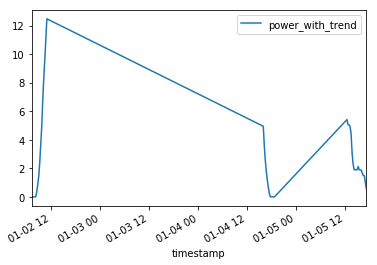

In [317]:
power_stable[:48].plot()

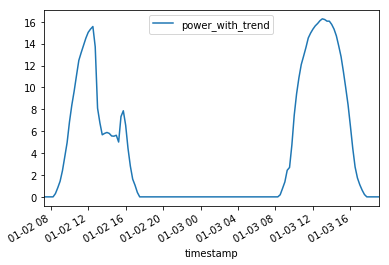

In [316]:
power66[:96].plot()

分类标准是云量，这个程度是不是已经差不多还可以了

### #############

In [181]:
data_66.loc[index_stable].head()

,Unnamed: 0,time,power,trend,power_with_trend,date
timestamp,,,,,,
2017-01-02 07:15:00,1,7.25,-0.105409,0.105409,0.0,2017-01-02
2017-01-02 07:30:00,2,7.50,-1.204324,1.204324,0.0,2017-01-02
2017-01-02 07:45:00,3,7.75,-2.311042,2.311042,0.0,2017-01-02
2017-01-02 08:00:00,4,8.00,-3.419157,3.419157,0.0,2017-01-02
2017-01-02 08:15:00,5,8.25,-4.522103,4.522103,0.0,2017-01-02


In [180]:
data_66['date'] = data_66.index.date

In [192]:
power66 = data_66[['power_with_trend']]

In [206]:
# power_66_normalized.head(100)

In [194]:
index = power66.index
scaler1 = MinMaxScaler(feature_range=(0,1))
power_66_normalized = pd.DataFrame(scaler1.fit_transform(power66))
power_66_normalized['index'] = index
power_66_normalized = power_66_normalized.set_index('index')

In [195]:
power_66_supervised = series_to_supervised(power_66_normalized, 48, 16)

In [207]:
# power_66_supervised['var1(t)']

In [209]:
# power_66_supervised.columns

In [248]:
inputs = power_66_supervised.iloc[:,:48]
outputs = power_66_supervised.iloc[:,48:]
# inputs.head()

In [249]:
for i in range(16):
    names['output_%s' % str(i+1)] = outputs.iloc[:,i]

### stable

In [223]:
input_stable = inputs.loc[index_stable]
input_stable = input_stable.dropna()

/Users/mayuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [252]:
for i in range(16):
    names['output_stable_%s' % str(i+1)] = names['output_%s' % str(i+1)].loc[list(map(lambda x:x+datetime.timedelta(minutes=15*i), index_stable))]
    names['output_stable_%s' % str(i+1)] = names['output_stable_%s' % str(i+1)].dropna()

/Users/mayuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [262]:
for i in range(16):
    names['input_stable_%s' % str(i+1)] = inputs.loc[names['output_stable_%s' % str(i+1)].index]

In [269]:
input_stable_2.head()

,var1(t-48),var1(t-47),var1(t-46),var1(t-45),var1(t-44),var1(t-43),var1(t-42),var1(t-41),var1(t-40),var1(t-39),...,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
index,,,,,,,,,,,,,,,,,,,,,
2017-01-04 16:15:00,0.221793,0.136457,0.086336,0.055423,0.030913,0.010654,0.0,0.0,0.0,0.0,...,0.679285,0.664379,0.634516,0.596100,0.549181,0.494808,0.432932,0.373207,0.323086,0.247404
2017-01-04 16:30:00,0.136457,0.086336,0.055423,0.030913,0.010654,0.000000,0.0,0.0,0.0,0.0,...,0.664379,0.634516,0.596100,0.549181,0.494808,0.432932,0.373207,0.323086,0.247404,0.180226
2017-01-04 16:45:00,0.086336,0.055423,0.030913,0.010654,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.634516,0.596100,0.549181,0.494808,0.432932,0.373207,0.323086,0.247404,0.180226,0.127954
2017-01-04 17:00:00,0.055423,0.030913,0.010654,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.596100,0.549181,0.494808,0.432932,0.373207,0.323086,0.247404,0.180226,0.127954,0.087437
2017-01-04 17:15:00,0.030913,0.010654,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.549181,0.494808,0.432932,0.373207,0.323086,0.247404,0.180226,0.127954,0.087437,0.057574


In [270]:
output_stable_2.head()

index
2017-01-04 16:15:00    0.127954
2017-01-04 16:30:00    0.087437
2017-01-04 16:45:00    0.057574
2017-01-04 17:00:00    0.031963
2017-01-04 17:15:00    0.010654
Name: var1(t+1), dtype: float64

In [279]:
# y, y_hat, rmse = ensembled_ANN(inputs = input_stable_1, 
#                                input_len = 48, 
#                                outputs = output_stable_2, 
#                                output_len = 1,
#                                train_len = 0,
#                                test_len = 2880,
#                                scaler=scaler1 )

In [291]:
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau

# parameters
input_len = 48
output_step = 1
num_feature = 1
batch_size = 512
epochs = 100

test_len = 2880

# split train and test(test one month)
train_x,train_y = input_stable_16[:-2880],output_stable_16[:-2880]
test_x,test_y = input_stable_16[-2880:],output_stable_16[-2880:]

# design network
model = Sequential()

model.add(Dense(int(input_len/2),input_dim=input_len , activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(output_step, activation='relu'))

adam = Adam(lr=0.001)

model.compile(loss='mse', optimizer='adam')

history = model.fit(train_x,train_y,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split = 0.1,
                    callbacks=[
                        TensorBoard(log_dir='/tmp/tensorboard', write_graph=True),
                        EarlyStopping(monitor='val_loss', patience=5, mode='auto')
                    ]
                    )

# make a prediction
y_hat = model.predict(test_x)
inv_yhat = scaler1.inverse_transform(y_hat)

test_y = pd.DataFrame(test_y)
inv_y = scaler1.inverse_transform(test_y)

rmse = evaluate(inv_y,inv_yhat)

Train on 10359 samples, validate on 1151 samples
Epoch 1/100
10359/10359 [==============================] - 1s 59us/step - loss: 0.0914 - val_loss: 0.0561
Epoch 2/100
10359/10359 [==============================] - 0s 8us/step - loss: 0.0576 - val_loss: 0.0377
Epoch 3/100
10359/10359 [==============================] - 0s 8us/step - loss: 0.0409 - val_loss: 0.0325
Epoch 4/100
10359/10359 [==============================] - 0s 8us/step - loss: 0.0346 - val_loss: 0.0337
Epoch 5/100
10359/10359 [==============================] - 0s 8us/step - loss: 0.0309 - val_loss: 0.0328
Epoch 6/100
10359/10359 [==============================] - 0s 8us/step - loss: 0.0296 - val_loss: 0.0312
Epoch 7/100
10359/10359 [==============================] - 0s 7us/step - loss: 0.0288 - val_loss: 0.0326
Epoch 8/100
10359/10359 [==============================] - 0s 8us/step - loss: 0.0286 - val_loss: 0.0327
Epoch 9/100
10359/10359 [==============================] - 0s 8us/step - loss: 0.0281 - val_loss: 0.0317
Epoch

In [285]:
# make a prediction
y_hat = model.predict(test_x)
inv_yhat = scaler1.inverse_transform(y_hat)

test_y = pd.DataFrame(test_y)
inv_y = scaler1.inverse_transform(test_y)

rmse = evaluate(inv_y,inv_yhat)

In [292]:
rmse

array([2.90059684])

In [290]:
inv_y.shape

(2880, 1)

In [293]:
len(train_x)

11510